In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [45]:
X,y= make_blobs(n_samples=1000,centers=4,n_features=2,random_state=42)

In [46]:
X

array([[-8.55503989,  7.06461794],
       [-6.13753182, -6.58081701],
       [-6.32130028, -6.8041042 ],
       ...,
       [ 3.69047995,  4.60555175],
       [-7.48913939, -7.0670809 ],
       [-9.40049578,  7.11430104]])

In [47]:
y

array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3,
       3, 3, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 3, 3, 1, 2, 1, 3,
       1, 3, 0, 1, 3, 1, 2, 0, 1, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 1, 0,
       2, 2, 1, 0, 3, 0, 1, 2, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 1, 3, 2, 2,
       0, 0, 0, 0, 1, 1, 3, 1, 3, 0, 1, 2, 1, 3, 3, 0, 3, 1, 1, 0, 2, 0,
       3, 2, 1, 1, 1, 1, 2, 3, 2, 1, 0, 2, 3, 1, 3, 2, 1, 3, 2, 1, 0, 2,
       1, 3, 1, 3, 0, 2, 1, 1, 0, 0, 3, 3, 3, 1, 1, 0, 0, 0, 0, 3, 2, 2,
       0, 1, 0, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 2, 3, 2, 1, 0, 0, 1, 0, 3,
       2, 3, 2, 3, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 1, 0, 1, 1, 0, 3, 2, 2,
       2, 3, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0, 2, 0, 3, 1,
       3, 3, 2, 0, 3, 0, 1, 2, 2, 0, 0, 2, 0, 3, 2, 2, 3, 2, 2, 1, 2, 3,
       2, 1, 3, 0, 1, 0, 1, 1, 1, 1, 3, 1, 1, 2, 0, 2, 2, 1, 1, 1, 3, 1,
       3, 3, 2, 1, 0, 3, 1, 0, 1, 2, 0, 3, 1, 3, 2, 1, 3, 2, 3, 1, 2, 0,
       0, 2, 0, 3, 3, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2,

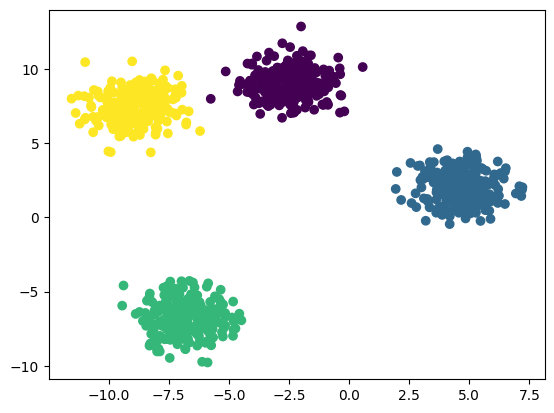

In [48]:
plt.scatter(X[:,0],X[:,1],c=y)

# **TrainTest Split**

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **Feature Scaling**

In [50]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **KMeans**

In [51]:
from sklearn.cluster import KMeans

# **Elbow Method to select K values**


In [52]:
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

In [53]:
wcss

[1599.9999999999993,
 850.6218518971011,
 196.82699345007296,
 48.47031743304423,
 43.58254996511339,
 39.180484603145345,
 35.263811234116986,
 32.42260152241285,
 28.035039060924092,
 25.889800768223697]

**Plotting Elbow Curve**

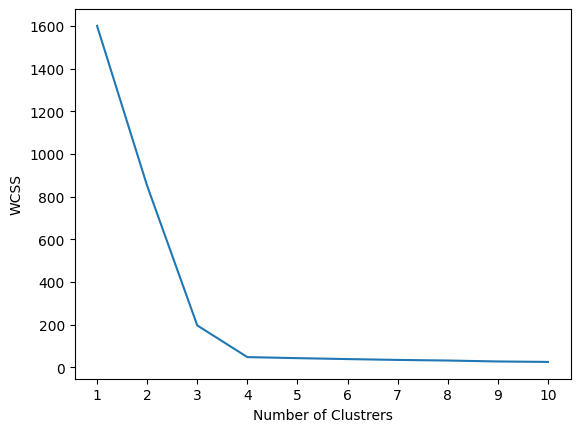

In [54]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [55]:
kmeans=KMeans(n_clusters=3,init="k-means++") ## As 3 makes the extreme difference in elbow curve

In [56]:
kmeans.fit_predict(X_train)

array([1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 2, 2, 2,
       0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0,
       2, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0,
       2, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2, 0,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0,
       1, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 0, 1,

In [57]:
y_pred=kmeans.predict(X_test)

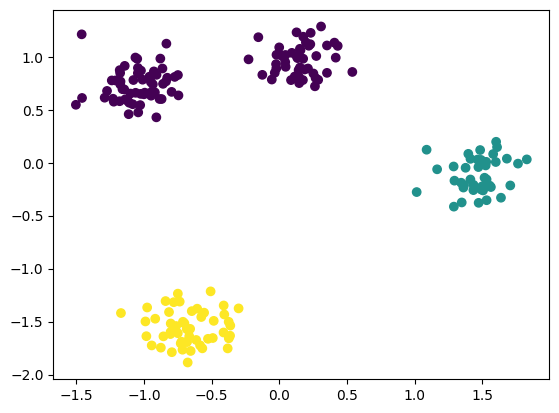

In [58]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [60]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.715
[[49  0  0  0]
 [ 0 41  0  0]
 [ 0  0 53  0]
 [57  0  0  0]]


# **Validating K Value**

**Knee Locator**

In [65]:
! pip install kneed

In [66]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

# **silhouette score**

In [75]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]

In [76]:
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmeans.fit(X_train)
  score=silhouette_score(X_train,kmeans.labels_)
  silhouette_coefficients.append(score)

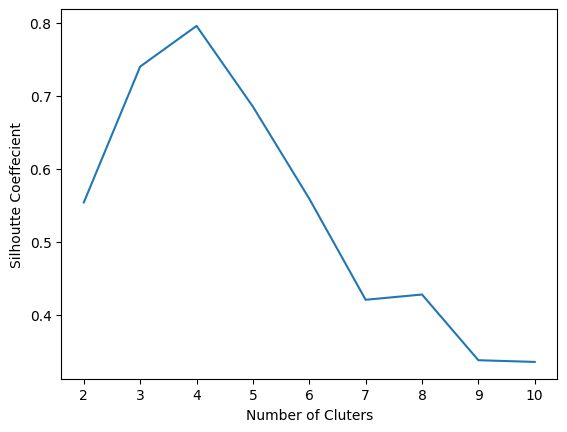

In [77]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()